<a href="https://colab.research.google.com/github/BazaiHassan/tesnorflow-DeepLearning/blob/main/tensorflow_classification_lr_callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
tf.random.set_seed(42)

In [ ]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
     1. CS231n - https://cs231n.github.io/neural-networks-case-study/
     2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[
        xx.ravel(), yy.ravel()]  # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[
        -1] > 1:  # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
# Dataset definition
n_samples = 1000

X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
# Create a classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

In [ ]:
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=tf.keras.metrics.binary_accuracy
)

In [ ]:
# Creating a learning rate callback
def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lr


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [ ]:
# Fit the model (Passing lr_scheduler callback)
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6977 - binary_accuracy: 0.5775 - lr: 0.1000
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5247 - binary_accuracy: 0.7563 - lr: 0.1000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3318 - binary_accuracy: 0.8737 - lr: 0.1000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1339 - binary_accuracy: 0.9600 - lr: 0.1000
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1035 - binary_accuracy: 0.9650 - lr: 0.1000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0291 - binary_accuracy: 0.9962 - lr: 0.1000
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0651 - binary_accuracy: 0.9812 - lr: 0.1000
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0714 - binary_accuracy: 0.9775 - lr: 0.1000
Epoch 9/100
25/25 [=============================

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...
313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


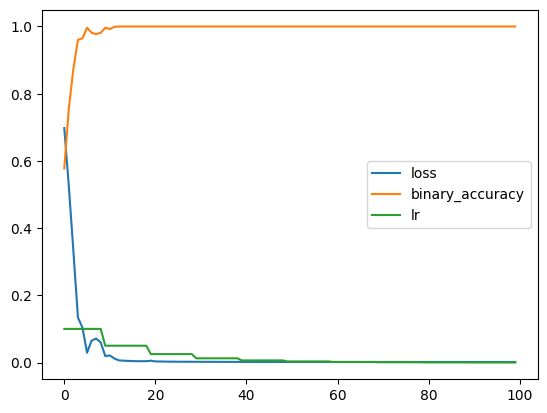

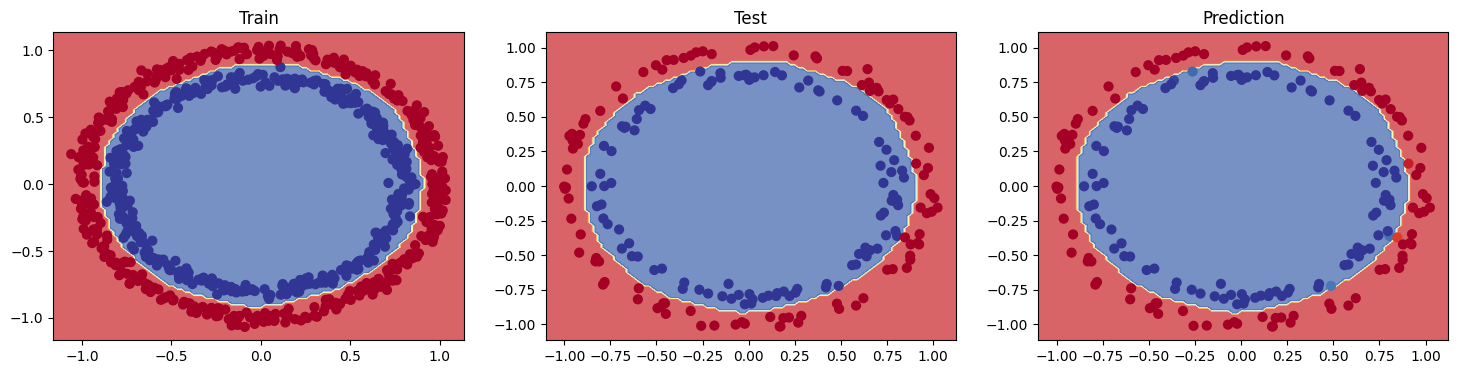

In [ ]:
# PostProcessing
pd.DataFrame(history.history).plot()

# Evaluate the model
y_pred = model.predict(X_test)

# Post-processing
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Train")
plot_decision_boundary(model, X=X_train, y=y_train)

plt.subplot(1, 3, 2)
plt.title("Test")
plot_decision_boundary(model, X=X_test, y=y_test)

plt.subplot(1, 3, 3)
plt.title("Prediction")
plot_decision_boundary(model, X=X_test, y=y_pred)


In [28]:
history_df = pd.DataFrame(history.history)
history_df



,loss,binary_accuracy,lr
0,0.697660,0.57750,0.100000
1,0.524679,0.75625,0.100000
2,0.331835,0.87375,0.100000
3,0.133912,0.96000,0.100000
4,0.103517,0.96500,0.100000
...,...,...,...
95,0.001501,1.00000,0.000195
96,0.001500,1.00000,0.000195
97,0.001499,1.00000,0.000195
98,0.001498,1.00000,0.000195
